## Logistic Regression

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Increasing the size of all graphs 
plt.rcParams['figure.figsize'] = 16, 10

In [2]:
# Suppressing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset into variables
dataset = pd.read_csv('Social_Network_Ads.csv')
rows, columns = dataset.shape
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, (columns - 1)].values
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


We are going to look at the Age and the EstimatedSalary of the users in the data set and predict if they will purchase the SUV.

In [4]:
# Checking the values of X and y
print("X Values")
print(X[:5])
print("\nY Values")
print(y[:10])

X Values
[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]

Y Values
[0 0 0 0 0 0 0 1 0 0]


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=0)

In [6]:
# Feature Scaling
# We need to apply feature scaling because we want accurate results.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
# Fitting Logistic Regression to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# Predicting the Test Set results
y_pred = classifier.predict(X_test)
print "y_test Values:", y_test                            
print "\ny_pred Values:", y_pred

y_test Values: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]

y_pred Values: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


###### Evalutating the Model performance

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print cm

[[65  3]
 [ 8 24]]


In the above confusion matrix we can see that the model has predicted 65+24 = 89 correct prediction and 8+3 = 11 wrong predictions which are a fairly good results

###### Visualising the Training set results
We take a range of values from min to max age X_set[:,0] and min to max salary X_set[:,1], and we also add + 1 and - 1 so that the values are not squeezed.

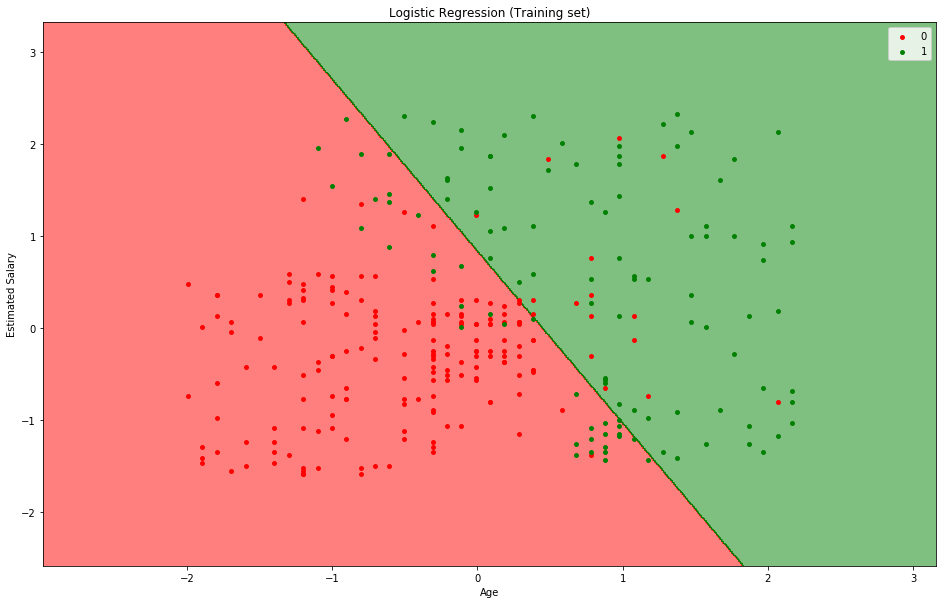

In [10]:
# This library helps us colorize our data points 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1,
              step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1,
              step=0.01))
# This function makes the contour between the two regions.
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(
                 X1.shape),
             alpha=0.50, cmap=ListedColormap(('red', 'green')))
# Here we plot the graph values
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Here we print the actual values of the training set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j,s=15)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

###### Visualising the Test set results

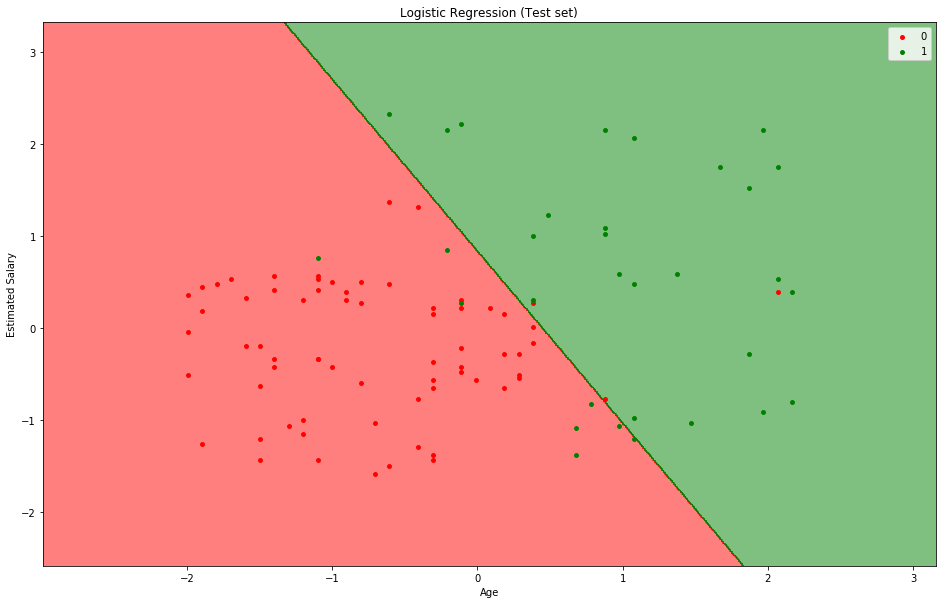

In [11]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1,
              step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1,
              step=0.01))
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(
                 X1.shape),
             alpha=0.50, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j,s=15)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()